<a href="https://colab.research.google.com/github/experienciarg200-alt/Python-con-Pandas/blob/main/Actividad5Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Rafael Augusto Guerrero Guerrero
*   MATRÍCULA: A01796515

En esta actividad trabajarás con el archivo `heart_disease.csv`, basado en un conjunto de datos sobre pacientes y variables clínicas relacionadas con enfermedades cardíacas, disponible en Kaggle.

Los datos fueron recopilados para analizar la presencia de enfermedades cardíacas en los pacientes y contienen información demográfica, clínica y resultados de pruebas diagnósticas. Los indicadores incluidos son:

* `id`: Identificador único de cada paciente
* `age`: Edad del paciente en años
* `origin`: Lugar de estudio
* `sex`: Masculino / Femenino
* `cp`: Tipo de dolor torácico (angina típica, angina atípica, no anginal, asintomático)
* `trestbps`: Presión arterial en reposo (en mm Hg al ingreso al hospital)
* `chol`: Colesterol sérico en mg/dl
* `fbs`: Si el azúcar en ayunas > 120 mg/dl
* `restecg`: Resultados del electrocardiograma en reposo (normal, anomalía ST-T, hipertrofia ventricular izquierda)
* `thalach`: Frecuencia cardíaca máxima alcanzada
* `exang`: Angina inducida por ejercicio (Verdadero / Falso)
* `oldpeak`: Depresión del segmento ST inducida por ejercicio respecto al reposo
* `slope`: Pendiente del segmento ST en el pico de ejercicio
* `ca`: Número de vasos principales coloreados por fluoroscopía (0 - 3)
* `thal`: Resultado de la prueba de perfusión cardíaca (normal, defecto fijo, defecto reversible)
* `num`: Indica si el paciente tiene o no enfermedad cardíaca, o el grado de enfermedad (0 = sano, 1 - 4 = enfermedad) Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

1. Descarga el archivo: `heart_disease.csv` y guarda, en un dataframe (`cardio_df`), todos sus registros.
* Haz que la columna `id` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Determina la cantidad de valores únicos por columna.

Existen 7 columnas numéricas y 8 de textos, o bien pueden ser números y textos.

In [2]:
cardio_df = pd.read_csv('heart_disease.csv')
cardio_df.set_index('id', inplace=True)
cardio_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   origin    918 non-null    object 
 3   cp        918 non-null    object 
 4   trestbps  859 non-null    float64
 5   chol      888 non-null    float64
 6   fbs       829 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    863 non-null    float64
 9   exang     863 non-null    object 
 10  oldpeak   856 non-null    float64
 11  slope     610 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       918 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 114.8+ KB


2. Examina las variables numéricas que presentan pocos valores únicos, ya que esto puede indicar que en realidad se tratan de variables categóricas codificadas como números.
* Si existen casos de este tipo, conviértelas a categóricas. Antes de hacerlo, revisa sus descripciones para determinar si son ordinales o nominales y, si son ordinales, establece el orden correcto de las categorías.

In [3]:
print(cardio_df.nunique().sort_values())

nominal_vars = [
    "sex", "cp", "fbs", "restecg", "exang", "thal"
]

cardio_df[nominal_vars] = cardio_df[nominal_vars].astype("category")

sex           2
fbs           2
exang         2
restecg       3
slope         3
thal          3
cp            4
origin        4
ca            4
num           5
age          50
oldpeak      53
trestbps     60
thalch      119
chol        216
dtype: int64


In [ ]:
from pandas.api.types import CategoricalDtype
slope_cat = CategoricalDtype(categories=[0, 1, 2], ordered=True)
cardio_df["slope"] = cardio_df["slope"].astype(slope_cat)

ca_cat = CategoricalDtype(categories=[0, 1, 2, 3], ordered=True)
cardio_df["ca"] = cardio_df["ca"].astype(ca_cat)

num_cat = CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=True)
cardio_df["num"] = cardio_df["num"].astype(num_cat)

print(cardio_df.dtypes)
print(cardio_df[["slope", "ca", "num"]].dtypes)


age            int64
sex         category
origin        object
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalch       float64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
num         category
dtype: object
slope    category
ca       category
num      category
dtype: object


3. Obtén las estadísticas descriptivas de las variables, realizando el análisis por separado para las variables numéricas y las categóricas.
* Para las numéricas, incluye el sesgo y la curtosis.
* Para las categóricas, imprime además las tablas de frecuencia.

In [4]:
num_vars = cardio_df.select_dtypes(include="number")

num_vars.describe()

stats_num = num_vars.describe().T
stats_num["skew"] = num_vars.skew()
stats_num["kurtosis"] = num_vars.kurtosis()

print(stats_num)

          count        mean        std   min    25%    50%    75%    max  \
age       918.0   53.530501   9.412783  28.0   47.0   54.0   60.0   77.0   
trestbps  859.0  132.294529  18.535875  80.0  120.0  130.0  140.0  200.0   
chol      888.0  242.189189  53.424806  85.0  216.0  223.0  268.0  603.0   
thalch    863.0  137.528389  25.950226  60.0  120.0  140.0  157.0  202.0   
oldpeak   856.0    0.880607   1.091840  -2.6    0.0    0.5    1.5    6.2   
ca        309.0    0.676375   0.935653   0.0    0.0    0.0    1.0    3.0   
num       918.0    0.995643   1.143939   0.0    0.0    1.0    2.0    4.0   

              skew  kurtosis  
age      -0.193710 -0.382511  
trestbps  0.630411  0.632992  
chol      1.640672  6.573848  
thalch   -0.209319 -0.483939  
oldpeak   1.037990  1.119834  
ca        1.165978  0.199498  
num       0.967855 -0.110596  


In [5]:
cat_vars = cardio_df.select_dtypes(include="category")

for col in cat_vars.columns:
    freq_table = pd.DataFrame({
        "Frecuencia": cardio_df[col].value_counts(),
        "Porcentaje (%)": cardio_df[col].value_counts(normalize=True) * 100
    })

    print(f"\nVariable: {col}")
    print(freq_table)

    print("\nModa:")
    print(cardio_df[col].mode())



Variable: sex
        Frecuencia  Porcentaje (%)
sex                               
Male           724       78.867102
Female         194       21.132898

Moda:
0    Male
Name: sex, dtype: category
Categories (2, object): ['Female', 'Male']

Variable: cp
                 Frecuencia  Porcentaje (%)
cp                                         
asymptomatic            495       53.921569
non-anginal             204       22.222222
atypical angina         174       18.954248
typical angina           45        4.901961

Moda:
0    asymptomatic
Name: cp, dtype: category
Categories (4, object): ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina']

Variable: fbs
       Frecuencia  Porcentaje (%)
fbs                              
False         691       83.353438
True          138       16.646562

Moda:
0    False
Name: fbs, dtype: category
Categories (2, bool): [False, True]

Variable: restecg
                  Frecuencia  Porcentaje (%)
restecg                                 

4. Calcula el porcentaje de valores faltantes en cada columna.
* Elimina aquellas columnas cuyo porcentaje de valores faltantes supere el 30%.
* Crea un mapa de calor que visualice la distribución de los valores faltantes en todas las columnas restantes.
* Algunas variables presentan valores faltantes de manera simultánea; es decir, en el mapa se pueden identificar filas donde varias están ausentes al mismo tiempo. Enumera cuáles son dichas variables e investiga si esta concurrencia tiene sentido desde un punto de vista médico o clínico.

R/ Las variables con valores faltantes (NAN) son: trestbps con 59 valores faltantes, chol con 30 valores faltantes, fbs con 89, thalch con 55, exang con 55 y oldpeak con 62 valores faltantes.

Estas variables están relacionadas con: Presión alterial, Colesterol, Glucosa en ayunas, pruebas de esfuerzos, etc. por lo que son de rigor tomarlas en cuenta.

In [6]:
missing_percent = cardio_df.isna().mean() * 100
print(missing_percent.sort_values(ascending=False))

ca          66.339869
thal        52.723312
slope       33.551198
fbs          9.694989
oldpeak      6.753813
trestbps     6.427015
thalch       5.991285
exang        5.991285
chol         3.267974
sex          0.000000
origin       0.000000
cp           0.000000
age          0.000000
restecg      0.000000
num          0.000000
dtype: float64


In [7]:
cols_to_drop = missing_percent[missing_percent > 30].index

cardio_df = cardio_df.drop(columns=cols_to_drop)

print("Columnas eliminadas:")
print(cols_to_drop)

Columnas eliminadas:
Index(['slope', 'ca', 'thal'], dtype='object')


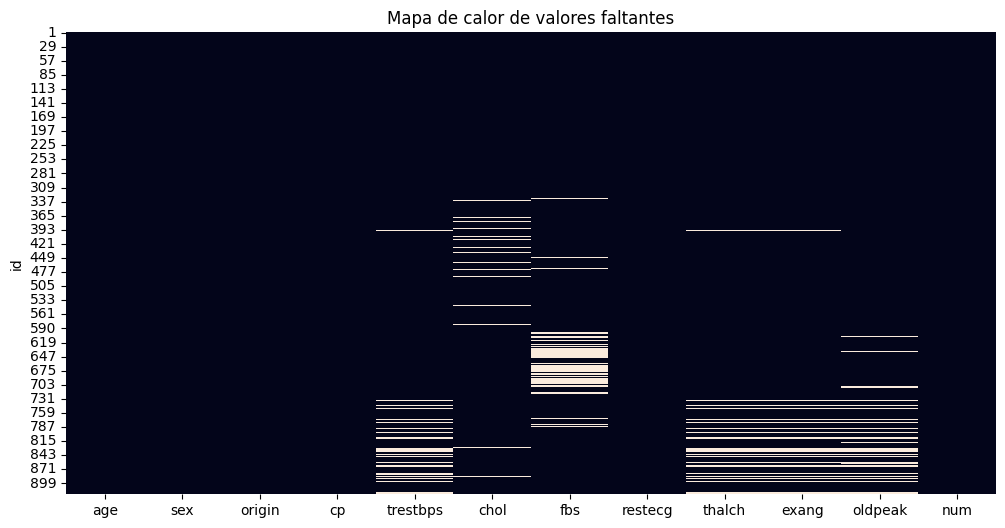

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(cardio_df.isna(), cbar=False)
plt.title("Mapa de calor de valores faltantes")
plt.show()

In [9]:
rows_multiple_missing = cardio_df[cardio_df.isna().sum(axis=1) > 1]

(rows_multiple_missing.head())

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
id,,,,,,,,,,,,
394,48,Female,Hungary,atypical angina,NaN,308.0,False,st-t abnormality,NaN,NaN,2.0,0
600,35,Male,Switzerland,asymptomatic,NaN,223.0,NaN,normal,130.0,True,NaN,3
607,38,Male,Switzerland,asymptomatic,150.0,223.0,NaN,normal,120.0,True,NaN,1
637,52,Male,Switzerland,asymptomatic,95.0,223.0,NaN,normal,82.0,True,NaN,2
706,65,Male,Switzerland,asymptomatic,145.0,223.0,NaN,st-t abnormality,67.0,False,NaN,3


In [10]:
print(cardio_df.isna().sum())

age          0
sex          0
origin       0
cp           0
trestbps    59
chol        30
fbs         89
restecg      0
thalch      55
exang       55
oldpeak     62
num          0
dtype: int64


5. Si centramos el análisis en una de las variables identificadas en el ejercicio anterior, se puede suponer que los hallazgos obtenidos podrían ser aplicables a las demás variables que presentan un patrón similar.

* ¿Tendrán los valores faltantes de `thalch` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
  *   Numéricas: `age`, `chol`
  *   Categóricas: `restecg`, `cp`

Para ello deberás dividir cada columna en dos grupos: con / sin faltantes en `thalch` y utilizar métodos gráficos y pruebas de hipótesis para ver si hay diferencias significativas.
* Incluye las conclusiones del análisis con los resultados obtenidos.
* Justifica si el mecanismo de faltantes de `thalch` es MCAR (*Missing Completely at Random*) o MAR (*Missing at Random*).

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

R//
Se analizó la relación entre los valores faltantes de thalch y las variables age, chol, restecg y cp.

Para las variables numéricas (age y chol), el test t no mostró diferencias estadísticamente significativas entre los grupos con y sin valores faltantes en thalch, porque p > 0.05

Para las variables categóricas (restecg y cp), la prueba chi-cuadrado tampoco evidenció asociación significativa porque p > 0.05

En consecuencia, no se encontraron indicios de que la ausencia de datos en thalch esté relacionada con las variables observadas analizadas, por lo que el mecanismo de faltantes podría clasificarse como MCAR.

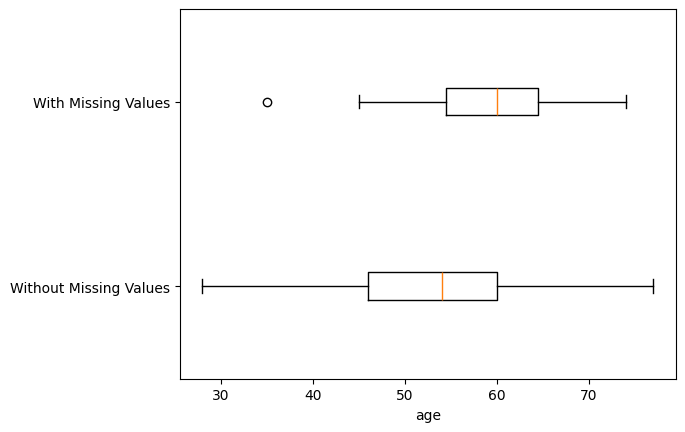

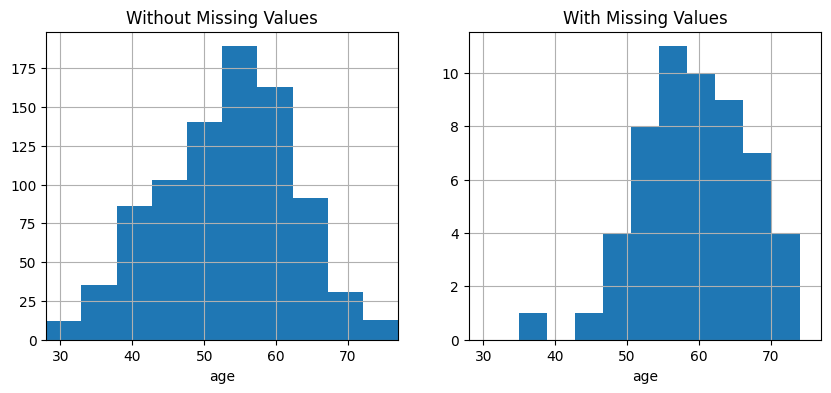

p-value of t-test: 1.5041244185890902e-06


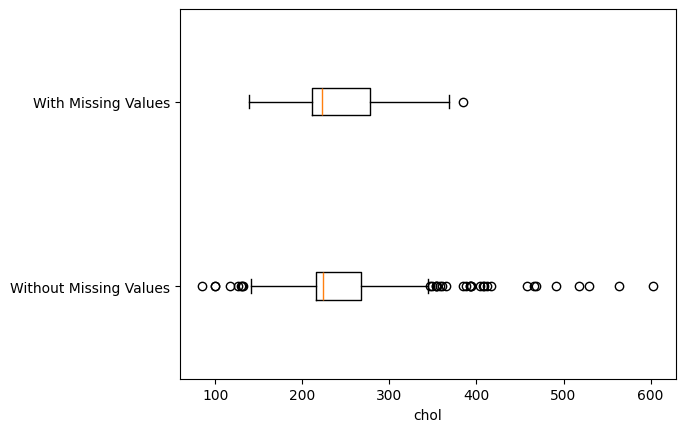

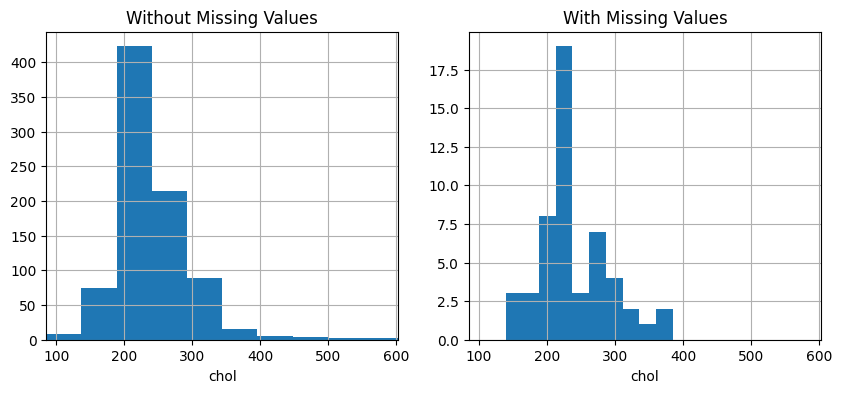

p-value of t-test: 0.7165289974295672


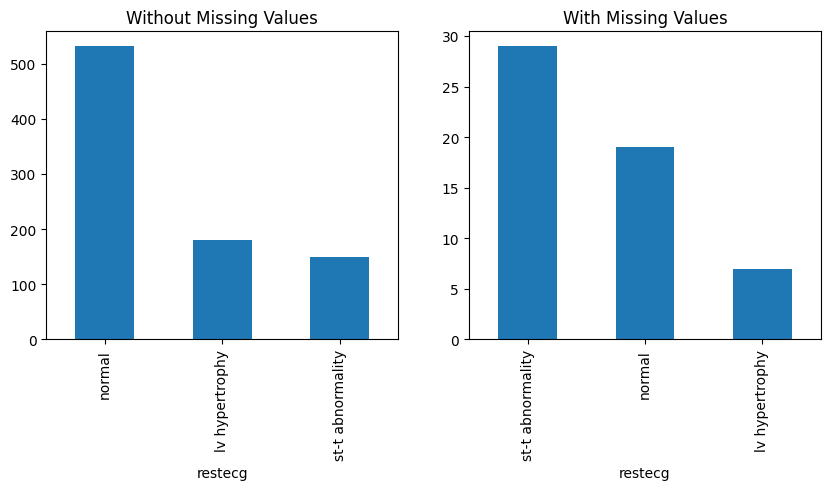

p-value of Chi_squared test: 1.1472889573985467e-09


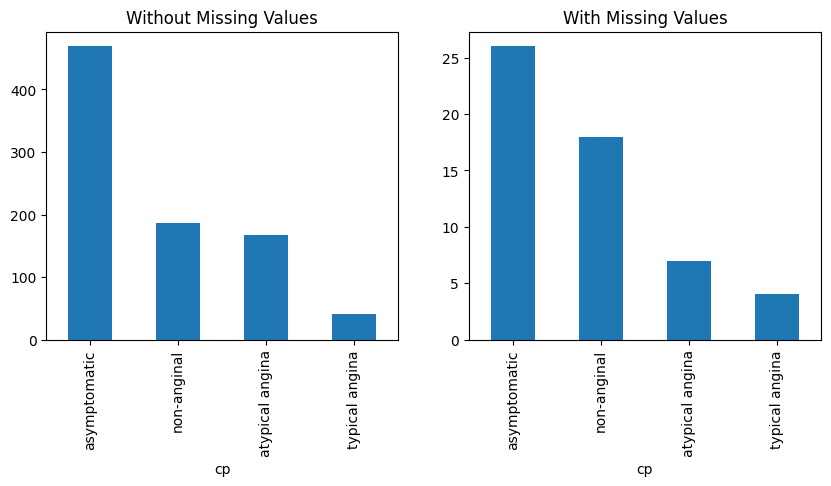

p-value of Chi_squared test: 0.15420097177251701


In [14]:
BM_thalch = cardio_df["thalch"].isna()

# Numéricas
p_age = Diagnose_MV_Numerical(cardio_df, "age", BM_thalch)
p_chol = Diagnose_MV_Numerical(cardio_df, "chol", BM_thalch)

# Categóricas
p_restecg = Diagnose_MV_Categorical(cardio_df, "restecg", BM_thalch)
p_cp = Diagnose_MV_Categorical(cardio_df, "cp", BM_thalch)

6. La imputación de una variable con valores faltantes puede realizarse por grupos o segmentos relevantes. Esto significa que, en lugar de utilizar una estadística global de toda la columna, se calcula la estadística correspondiente dentro de cada grupo definido por otra variable, haciendo:

> `df['var_with_missing'] = df.groupby('related_var')['var_with_missing'].transform(lambda x: x.fillna(x.median()))`

* Utiliza la variable `restecg` para separar los grupos e imputar `thalch` y todas las variables con patrón de faltantes similar (identificadas en el ejercicio 4) Asegúrate de cambiar la función de agregado si hay variables no numéricas.
* Vuelve a generar el mapa de calor para verificar que los valores faltantes en estas variables hayan sido imputados.

In [15]:
num_vars_missing = ['thalch', 'oldpeak', 'trestbps']

for col in num_vars_missing:
    cardio_df[col] = (
        cardio_df
            .groupby('restecg')[col]
            .transform(lambda x: x.fillna(x.median()))
                )


/tmp/ipython-input-3879518403.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('restecg')[col]


In [ ]:
print(cardio_df[num_vars_missing].isna().sum())

thalch      0
oldpeak     0
trestbps    0
dtype: int64


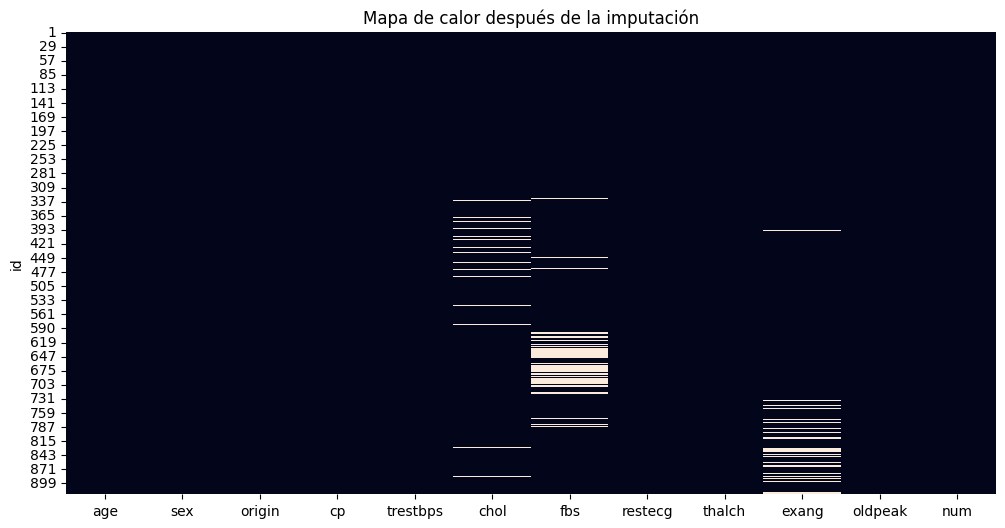

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(cardio_df.isna(), cbar=False)
plt.title("Mapa de calor después de la imputación")
plt.show()

7. Para las variables que aún presentan valores faltantes, realiza la imputación utilizando estadísticas generales calculadas sobre toda la columna, sin segmentar por grupos. Esta vez utiliza la clase `SimpleImputer` de sklearn
* Justifica la estrategia (*mean, median, most_frequent*) que emplees en cada caso.


R//
Para la variable numérica chol se utilizó la imputación por mediana (strategy='median'), debido a que los valores de colesterol pueden presentar asimetría y posibles valores extremos, por lo que la mediana resulta más consistente que la media.

En el caso de las variables fbs y exang, aunque están codificadas como 0 y 1, representan variables categóricas binarias. Por ello, se empleó la estrategia most_frequent, que reemplaza los valores faltantes por la categoría más común, preservando la estructura original de la variable.

Tras la imputación, se verificó que no permanecen valores faltantes en el conjunto de datos.

In [17]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
cardio_df[['chol']] = num_imputer.fit_transform(cardio_df[['chol']])

cat_imputer = SimpleImputer(strategy='most_frequent')
cardio_df[['fbs', 'exang']] = cat_imputer.fit_transform(cardio_df[['fbs', 'exang']])

print(cardio_df[['chol','fbs','exang']].isna().sum())

chol     0
fbs      0
exang    0
dtype: int64


8. Dibuja boxplots de todas las variables numéricas.
* Obtén los valores atípicos mediante el método gráfico, a partir del objeto devuelto por el boxplot.

R// Valores atípicos:
trestbps = 80, 172, 180, 190, 200...
chol= 85, 100, 117..., muy bajos. 468, 529, 603..., muy altos.
fbs = 1. 1. 1. 1. 1. ...
thalch = 60, 63
oldpeak = -2.6, 6.2, 5.6, 4.4...

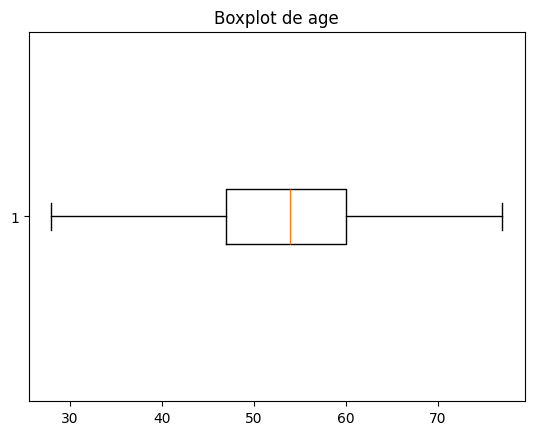

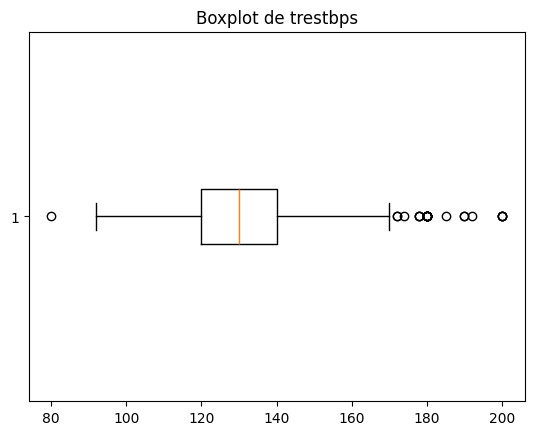

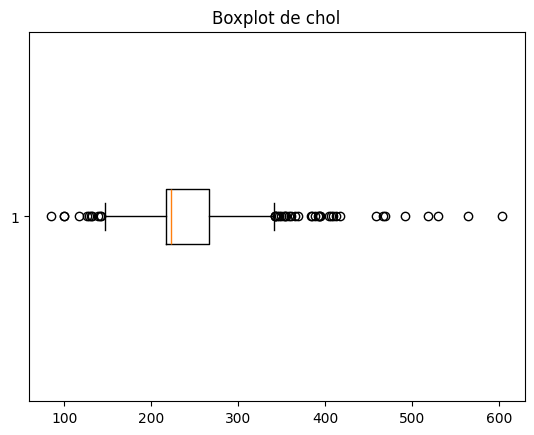

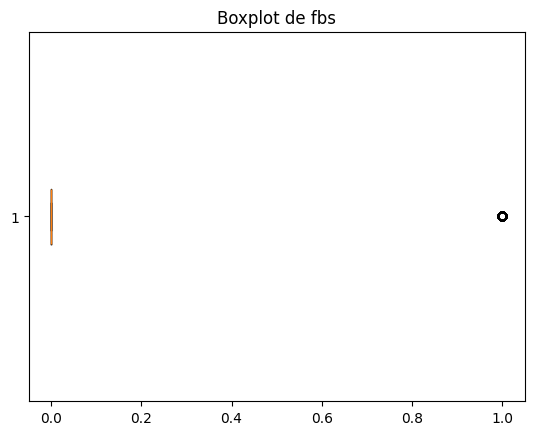

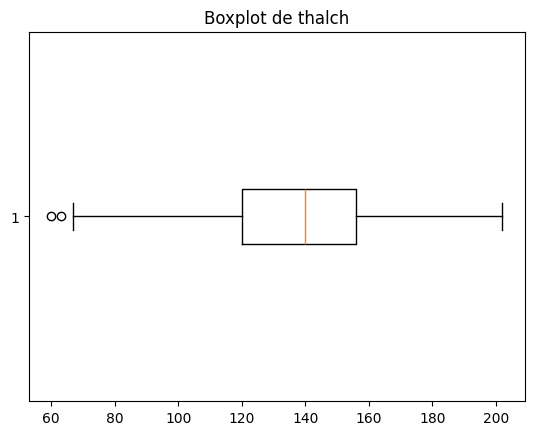

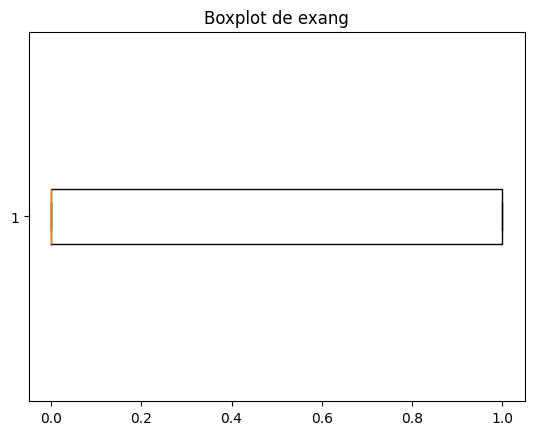

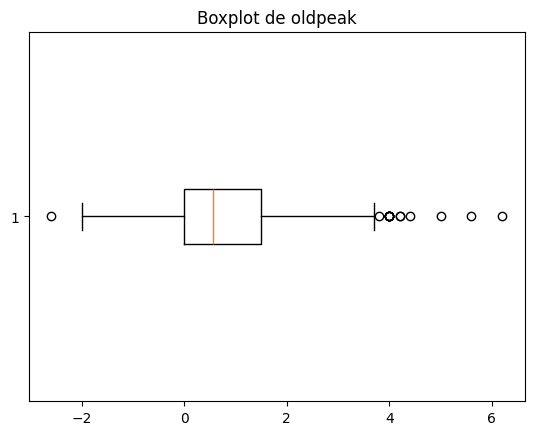

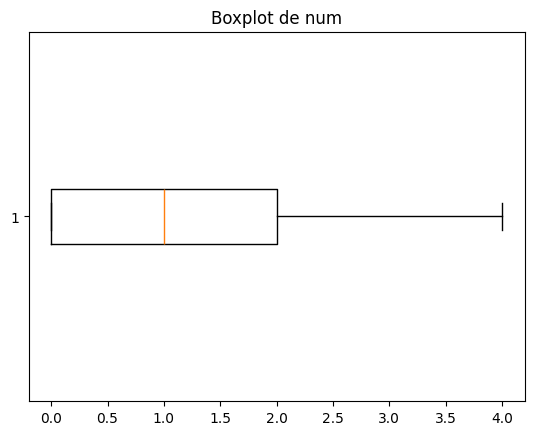


Variable: age
Outliers: []

Variable: trestbps
Outliers: [ 80. 172. 180. 200. 174. 178. 192. 180. 178. 180. 190. 180. 180. 180.
 180. 200. 180. 180. 180. 200. 185. 200. 180. 178. 172. 180. 190.]

Variable: chol
Outliers: [141. 126. 131. 132. 129. 100.  85. 117. 100. 142. 139. 354. 353. 417.
 360. 407. 564. 394. 409. 342. 358. 412. 468. 365. 344. 394. 347. 466.
 529. 392. 355. 603. 342. 404. 518. 388. 491. 342. 393. 458. 384. 349.
 369. 385.]

Variable: fbs
Outliers: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Variable: thalch
Outliers: [60. 63.]

Variable: exang
Outliers: []

Variable: oldpeak
Outliers: [-2.6  6.2

In [18]:
num_cols = cardio_df.select_dtypes(include=['int64', 'float64']).columns
outliers_dict = {}

for col in num_cols:
    plt.figure()
    bp = plt.boxplot(cardio_df[col].dropna(), vert=False)
    plt.title(f"Boxplot de {col}")
    plt.show()

    outliers = bp['fliers'][0].get_xdata()
    outliers_dict[col] = outliers

for col, values in outliers_dict.items():
    print(f"\nVariable: {col}")
    print("Outliers:", values)

9. Para la variable `trestbps`, calcula los valores atípicos utilizando el método del rango intercuartílico (IQR).
* Para ello obtén los cuartiles necesarios y determina los límites superior e inferior para filtrar los valores que se encuentren fuera de ese rango.
* Verifica si los resultados coinciden con los obtenidos en el ejercicio anterior.

In [19]:
Q1 = cardio_df['trestbps'].quantile(0.25)
Q3 = cardio_df['trestbps'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Límite inferior:", lower_limit)
print("Límite superior:", upper_limit)

outliers_trestbps = cardio_df[
    (cardio_df['trestbps'] < lower_limit) |
    (cardio_df['trestbps'] > upper_limit)
]['trestbps']

print("Valores atípicos encontrados:")
print(outliers_trestbps.values)

Q1: 120.0
Q3: 140.0
IQR: 20.0
Límite inferior: 90.0
Límite superior: 170.0
Valores atípicos encontrados:
[172. 180. 200. 174. 178. 192. 180. 178. 180. 190. 180. 180. 180. 180.
 200. 180. 180.  80. 180. 200. 185. 200. 180. 178. 172. 180. 190.]


10. Elimina los valores atípicos identificados de la variable `trestbps`.
* Dibuja el boxplot final para visualizar la distribución depurada.

In [20]:
cardio_df_clean = cardio_df[
    (cardio_df['trestbps'] >= lower_limit) &
    (cardio_df['trestbps'] <= upper_limit)
].copy()

print("Registros originales:", cardio_df.shape[0])
print("Registros después de eliminar outliers:", cardio_df_clean.shape[0])


Registros originales: 918
Registros después de eliminar outliers: 891


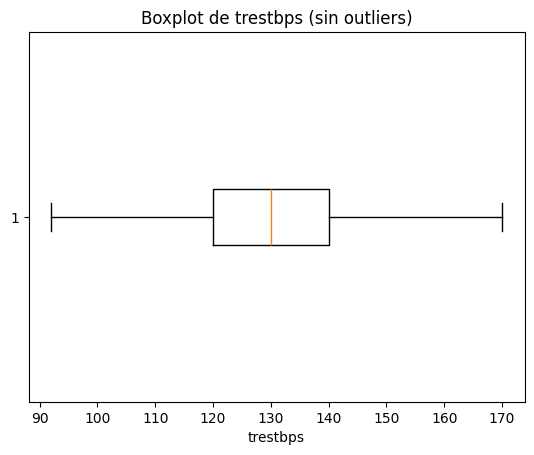

In [21]:
plt.figure()
plt.boxplot(cardio_df_clean['trestbps'], vert=False)
plt.title("Boxplot de trestbps (sin outliers)")
plt.xlabel("trestbps")
plt.show()